In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10

https://www.hackerearth.com/practice/machine-learning/transfer-learning/transfer-learning-intro/tutorial/

In [52]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [2]:
(x_train,_y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
_y_train.shape

(50000, 1)

In [5]:
# train label
_y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
print("There are {} train images and {} test images.".format(x_train.shape[0], x_test.shape[0]))
print('There are {} unique classes to predict.'.format(np.unique(_y_train).shape[0]))

There are 50000 train images and 10000 test images.
There are 10 unique classes to predict.


# We, can see that there are 50,000 train images and 10,000 test images with 10 unique classes to predict. Next, we will one-hot label our train and test labels.

In [8]:
num_classes=10
from keras.utils import np_utils
y_train=np_utils.to_categorical(_y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)

# visualize our training data. We will display the first eight images in the training data.

In [9]:
#After one hot encoding


y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_train.shape

(50000, 10)

In [11]:
y_test.shape

(10000, 10)

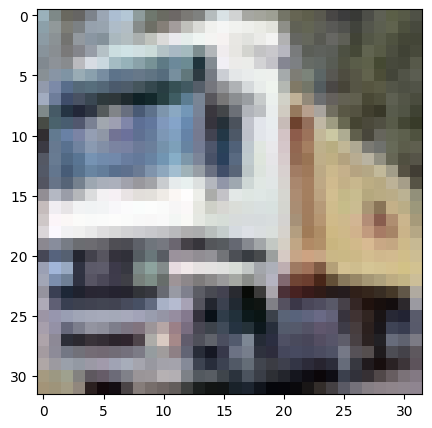

In [12]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))

plt.imshow(x_train[1])
plt.show() 

# Each image in  Dataset is of size (32 32 3) build a model from scratch. We will be sticking with the keras framework to build our model as it is easy to understand, but you may use other frameworks also.

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,MaxPooling2D,Conv2D,GlobalAveragePooling2D

In [14]:
#Building a Sequential Model

model=Sequential([Conv2D(32,(2,2),activation='relu',input_shape=(32,32,3))
                  ,MaxPooling2D((2,2))
                  
                  ,Conv2D(64,(2,2)),
                  MaxPooling2D((2,2)),
                  
                  Conv2D(128,(2,2)),
                  MaxPooling2D((2,2)),
                  
                  GlobalAveragePooling2D(),
                  Dense(10,activation='Softmax')
                 ])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0

# we can see that our model contains three convolutional layers, each followed by a max pooling layer and finally a Global Average Pooling layer followed by a dense layer with \u2018softmax\u2019 as the activation function. 

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

# Finally, we will rescale our data. Rescale is a value by which we will multiply the data such that the resultant values lie in the range (0-1). So, in general, scaling ensures that just because some features are big in magnitude, it doesn\u2019t mean they act as the main features in predicting the label.

In [16]:
x_train_scratch=x_train/255.
x_test_scratch=x_test/255.

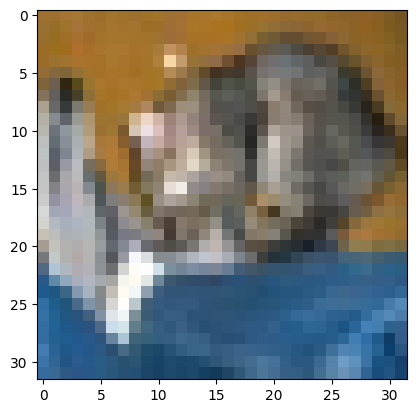

In [17]:
plt.imshow(x_test_scratch[0])
plt.show()

Next, we will create a checkpointer to save the weights of the best model (i.e. the model with minimum loss).

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
checkpoint=ModelCheckpoint(filepath='cifer_Model.hdf5',verbose=1,save_best_only=True)

# Finally, we will fit the model to the training data points and labels. We will split the whole training data in batches of 32 and train the model for 10 epochs. We will use be 20 percent of our training data as our validation data. Hence, we will train the model on 10000 samples and validate of 10000 samples.

In [21]:
#Fitting the Model on the training and label

model.fit(x_train_scratch,y_train,batch_size=64,epochs=20,verbose=1,callbacks=[checkpoint],validation_split=0.3,shuffle=True)


Epoch 1/20
547/547 [==============================] - 6s 11ms/step - loss: 0.1390 - accuracy: 0.7105 - val_loss: 0.1700 - val_accuracy: 0.6321

Epoch 00001: val_loss did not improve from 0.16519
Epoch 2/20
547/547 [==============================] - 5s 10ms/step - loss: 0.1375 - accuracy: 0.7115 - val_loss: 0.1627 - val_accuracy: 0.6516

Epoch 00002: val_loss improved from 0.16519 to 0.16266, saving model to cifer_Model.hdf5
Epoch 3/20
547/547 [==============================] - 5s 10ms/step - loss: 0.1366 - accuracy: 0.7172 - val_loss: 0.1634 - val_accuracy: 0.6532

Epoch 00003: val_loss did not improve from 0.16266
Epoch 4/20
547/547 [==============================] - 5s 10ms/step - loss: 0.1361 - accuracy: 0.7139 - val_loss: 0.1633 - val_accuracy: 0.6538

Epoch 00004: val_loss did not improve from 0.16266
Epoch 5/20
547/547 [==============================] - 5s 10ms/step - loss: 0.1344 - accuracy: 0.7198 - val_loss: 0.1615 - val_accuracy: 0.6543

Epoch 00005: val_loss improved from 0.

In [22]:
#Evaluate the model on the test data
score = model.evaluate(x_test_scratch, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1626 - accuracy: 0.6665
Accuracy on the Test Images:  0.6664999723434448


In [1]:
from tensorflow.keras.models import load_model

cifer_model=load_model('cifer_Model.hdf5')

In [2]:
cifer_model.predict(x_test)

NameError: name 'x_test' is not defined

In [ ]:
x_test.shape

In [46]:
import cv2

img=cv2.imread('C:\\Users\\Liton\\Pictures\\Saved Pictures\\d.jpg')
img=cv2.resize(img,(32,32))

img=np.expand_dims(img, axis=0)
print(img.shape)

(1, 32, 32, 3)


In [47]:
pred=model.predict(img)

In [48]:
index_Name=np.argmax(pred[0])

In [49]:
_y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [53]:
class_name[index_Name]

'airplane'

In [32]:
#Deployment data


from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
def load_image(img_pa):
    
   
    class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    img = Image.open(img_pa)
    img = np.array(img)
    
    img=cv2.resize(img,(32,32))

    img=np.expand_dims(img, axis=0)
    
    img=img/255.
    
    cifer_model=load_model('cifer_Model.hdf5')
    
    pred=cifer_model.predict(img)
    
    index_Name=np.argmax(pred[0])
    
    return class_name[index_Name]



# print(load_image(r"C:\\Users\\Liton\\Deep Learning\\test1\\45.jpg"))



In [36]:

import numpy as np

from flask import Flask,request,jsonify,render_template

In [37]:
import os
tmdir=os.path.abspath('C:\\Users\\Liton\\Desktop\\Portfolio')
app=Flask(__name__,template_folder=tmdir)
# run_with_ngrok(app)

In [38]:
@app.route('/')
def correct():
    return render_template('Cifer.html')


@app.route('/successCifer', methods = ['POST'])  

def success():  
    if request.method == 'POST':  
        f = request.files['file']  
       
        r=load_image(f)
        
        return render_template("successCifer.html", name = r)  
    
if __name__ == '__main__':  
    app.run()  


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Sep/2021 15:06:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Sep/2021 15:06:46] "POST /successCifer HTTP/1.1" 200 -
